In [81]:
# Standars libraries
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
import pickle
import itertools as it
from collections import Counter
import pyspark
from pyspark import *
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql import functions as F
#import country_converter as coco

import spacy

from os import path
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
import re

import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 199)


START_DATE = '2019-12-12'
END_DATE = '2020-04-09'

coronavirus = "coronavirus,covid,covid-19,corona,pandémie,virus, pandemie".lower().split(',')#pandémie,virus

Python version
3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
Version info.
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


In [180]:
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
jsondf = spark.read.json("/mnt/datastore/data/COVID-19-TweetsIds/2020-0*/*.jsonl.gz");
jsondf.count()

97439996

In [181]:
print(os.getenv('PYSPARK_PYTHON'))
print(os.getenv('PYSPARK_DRIVER_PYTHON'))

None
None


In [182]:
jsondf.printSchema()

root
 |-- coordinates: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- followers: long (nullable = true)
 |-- friends: long (nullable = true)
 |-- likes: long (nullable = true)
 |-- place: struct (nullable = true)
 |    |-- bounding_box: struct (nullable = true)
 |    |    |-- coordinates: array (nullable = true)
 |    |    |    |-- element: array (containsNull = true)
 |    |    |    |    |-- element: array (containsNull = true)
 |    |    |    |    |    |-- element: double (containsNull = true)
 |    |    |-- type: string (nullable = true)
 |    |-- contained_within: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- country: string (nullable = true)
 |    |-- country_code: string (nullable = true)
 |    |-- full_name: string (nullable = true)
 |    |-- id: string (nullable = true)
 |  

In [183]:
vaccines = jsondf.filter(col('text').contains('vaccine'))
vaccines.count()

521254

In [212]:
accounts = 'andele1901,FrontPopOff,tvlofficiel,YLioubovAnti,silvano_trotta,PolygrapheL,QanonFrance,Breizh_Info,PascalEysseric,ReinformationRC,meridien_zero,pierre_1er,InstitutILIADE,InfosFrancaises,_informaction,BVoltaire,ObservateursCH,novopress,Les4verites,ndffr,PrJoyeux,FlorianeJeannin,_polemia,euro_libertes,BlaiseElise'.lower().split(',')
test = jsondf.filter(lower(col('user_name')).isin(accounts))


626

In [213]:
test = test.toPandas()
test.head()

,coordinates,created_at,followers,friends,likes,place,retweets,text,tweet_id,user_id,user_location,user_name
0,None,Sat Feb 29 18:14:19 +0000 2020,64023,1945,62,None,51,"COVID-19 : Premier décès en Amérique, dans l'État de Washington, aux États-Unis.\nEn Italie, le millier de cas a été atteint avec 1128 personnes contaminées et 29 morts.\nEn Iran le bilan officie...",1233817793247744000,4061586491,Monde entier,InfosFrancaises
1,None,Sat Feb 29 20:38:59 +0000 2020,64040,1945,88,None,64,"COVID-19 / FRANCE : Dans l'Oise, 83 écoles, 10 collèges et 9 lycées seront fermés à partir de lundi. 26.123 élèves et 2.113 personnels n’effectueront pas leur rentrée scolaire (rectorat). #COVID1...",1233854199898742785,4061586491,Monde entier,InfosFrancaises
2,None,Sat Feb 29 20:57:52 +0000 2020,64040,1945,138,None,101,"COVID-19 / FRANCE : Dans les communes de Creil, Crépy-en-Valois, Vaumoise, Lamorlaye, Lagny-le-Sec, Nogent sur Oise, Villers-Saint-Paul et Montataire, dans l'Oise, et La Balme-de-Sillingy en Haut...",1233858951848120322,4061586491,Monde entier,InfosFrancaises
3,None,Fri Feb 28 03:43:17 +0000 2020,5179,382,0,None,55,"RT @afpfr: Coronavirus: un cas recensé au Nigeria, le 1er en Afrique subsaharienne, a annoncé le ministère de la Santé #AFP https://t.co/1u…",1233236202989522944,561992546,,pierre_1er
4,None,Fri Feb 28 03:32:19 +0000 2020,5179,382,0,None,223,RT @BasedPoland: As if Europe didn't have enough problems with the #Coronavirus...\n\nIt now looks like the summer of 2020 could make the Eur…,1233233440054665217,561992546,,pierre_1er


In [215]:
test[test['text'].str.contains('vaccin')].head()

,coordinates,created_at,followers,friends,likes,place,retweets,text,tweet_id,user_id,user_location,user_name
238,None,Thu Apr 23 20:54:58 +0000 2020,1696,71,101,None,72,"Certains sauvent des vies, d'autres attendent le vaccin de Gates. Les premiers sont menacés ! \n\nhttps://t.co/gw2pdFeDUC",1253427166781440000,32867753,Strasbourg,silvano_trotta
259,None,Sun Apr 19 00:34:33 +0000 2020,5158,380,0,None,50,RT @SputnikInt: Gates Foundation calls for global solidarity to vaccinate seven billion people from coronavirus\n\n@gatesfoundation https://t…,1251670484300763137,561992546,,pierre_1er
394,None,Wed Mar 18 23:03:01 +0000 2020,2212,825,2,None,0,"Pour ceux qui paniquent à cause du Coronavirus en tant que tel lisez ça !!! Ayez plus peur des mesures qui seront mises en place par les 2 paliers de gouvernements, quarantaine forcé,vaccination ...",1240413427186753538,1171882525737795586,Montreal,PolygrapheL
559,None,Wed Mar 25 08:43:58 +0000 2020,5157,381,0,None,49,RT @ComplotsFaciles: Y'a vraiment des gens qui pensent que le nouveau #coronavirus a été créé en labo pour pouvoir vendre des vaccins. Quel…,1242733956841308160,561992546,,pierre_1er
609,None,Sat Jan 25 02:56:36 +0000 2020,5187,382,0,None,120,"RT @Reuters: With Wuhan virus genetic code in hand, scientists begin work on a vaccine https://t.co/rbZa9yMrf2 https://t.co/BdvhRGdRdL",1220903264490795008,561992546,,pierre_1er


Text(0.5, 1.0, 'Number of tweet mentionning vaccine and coronavirus')

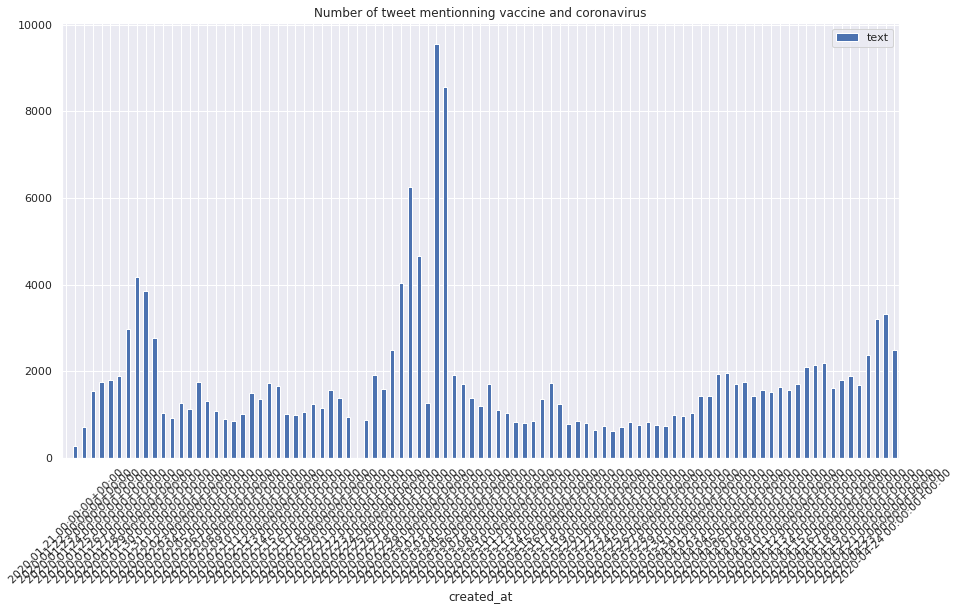

In [187]:
#vaccines_df = vaccines.toPandas()
#vaccines_df['created_at'] = pd.to_datetime(vaccines_df['created_at'])
#vaccines_df = vaccines_df.sort_values(by=['created_at'])
vaccines_df = vaccines_df.drop_duplicates(subset=['text'])

vaccines_df_count = vaccines_df.resample('D', on='created_at').agg({'text':'count'})
vaccines_df_count[['text']].plot(kind='bar', figsize=(15, 8))
plt.xticks(rotation=45)
plt.title('Number of tweet mentionning vaccine and coronavirus')

In [202]:
vaccines_df.text.str.contains('#').count()

163377

In [203]:
vaccines_df['hashtags'] = vaccines_df.text.str.findall('#([A-Za-z0-9]+)')
vaccines_df.head(50)

,coordinates,created_at,followers,friends,likes,place,retweets,text,tweet_id,user_id,user_location,user_name,hashtags
521252,None,2020-01-21 22:41:03+00:00,2253,931,0,None,1,RT @NFIDvaccines: #Pregnant? Learn tips for having a healthy pregnancy and giving your baby a healthy start in life: https://t.co/cGo5jeFNC…,1219751790654185473,37674702,"Chicago, IL",EverThriveIL,[Pregnant]
521253,None,2020-01-21 22:54:22+00:00,638,835,0,None,17,RT @Just4TheCause: Sell a useless vaccine to #Bought officials \n\nInsist the only way the vaccine “works” is if EVERY CHILD gets it FIVE TIM…,1219755143748558849,1124810381824860165,,LexyMarconi,[Bought]
521250,None,2020-01-22 00:03:46+00:00,55,246,0,None,124,RT @BenSwann_: Study: CDC's Vaccine Schedule May Be Harmful To Children https://t.co/zpZNPFgm3n #sb276 #vaccinetruth #vaccines,1219772607681220609,1167520876570566656,,Roxy_VelCo,"[sb276, vaccinetruth, vaccines]"
521249,None,2020-01-22 00:37:12+00:00,241,179,0,None,2,"RT @HPVvaxSC: If there were a vaccine against #Cancer wouldn’t you get it for your kids? There is, and you can! #HPVvaxNOW #OurMoment\nhttps…",1219781023023685633,70808950,,dkmacadams,"[Cancer, HPVvaxNOW, OurMoment]"
521251,None,2020-01-22 01:49:13+00:00,449,486,0,None,0,@Abeyspams @anhisu7 There is a scientist at the cdc that said that through away data showing African American boys were 300% more likely to become autistic if they receive the vaccine at a certai...,1219799143570259968,303598710,,BollywoodBecky_,[]
521236,None,2020-01-22 02:09:41+00:00,31916,2298,12,None,8,"Re #WuhanCoronavirus outbreak, people have been asking me about Tamiflu and vaccines, so here's a quick @sciblogsnz post about them: https://t.co/Bu05QIuTWC",1219804293907116032,356788303,Aotearoa New Zealand,SiouxsieW,[WuhanCoronavirus]
521234,None,2020-01-22 02:27:35+00:00,394,23,0,None,37,"RT @CDCDirector: For more than 50 years, hundreds of millions of Americans have safely received #flu vaccines. There is extensive research…",1219808801483784198,934920511506616321,"Denver, CO",tedwlsn31,[flu]
521235,None,2020-01-22 02:36:56+00:00,225,474,0,None,6,"RT @0I_330: Doctors receive very little training in toxicology. They are not taught what vaccines contain, they are only taught that what t…",1219811152726822912,634138846,,BrelynShockley,[]
521231,None,2020-01-22 02:45:30+00:00,361,558,0,None,75,RT @med1cinewoman: Brand new study on exposure to #aluminum's link to the etiology of fAD. Let's apply this to the #CDC childhood vaccine s…,1219813307726602242,991081864487030784,,queen_khalifia,"[aluminum, CDC]"
521232,None,2020-01-22 02:52:10+00:00,348,555,0,None,136,RT @med1cinewoman: Are you willing to surrender your right to choose what goes into your child's body? The #CDC vaccine schedule is a recom…,1219814985091579904,1107957243763277824,New Zealand,CateFearless,[CDC]


In [209]:
vaccines_df['hashtags'].explode().str.lower().value_counts().head(100)

coronavirus              18845
covid19                   8403
vaccine                   5506
covid                     4053
vaccines                  2134
china                     1350
coronavirusoutbreak       1082
trump                      670
covid2019                  667
flu                        660
wuhan                      632
corona                     631
cdc                        620
virus                      611
billgates                  490
2019ncov                   455
sars                       452
who                        424
pandemic                   415
health                     396
vaccineswork               368
coronaoutbreak             360
wuhancoronavirus           345
biotech                    310
ncov2019                   303
news                       290
coronavirusupdate          286
coronaviruspandemic        277
lockdown                   273
sarscov2                   271
science                    264
coronavirusvaccine         258
stayhome

In [211]:
import re
import nltk

#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

stop_words = set(stopwords.words("english"))

##Creating a list of custom stopwords
new_words = ["rss", "extrait", "source", "auteur", "shared", "items", "on", "the", "old", "reader", "jt", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche"]
stop_words = stop_words.union(new_words)

nlp = spacy.load("en_core_web_sm")

# Clean and prepare the titles for processing
def generateCorpus(sentences, stop_words):
    corpus = []
    for i, title in enumerate(sentences):
        title = title.replace("\n", " ")
        
        print(str(i + 1) + "/" + str(len(sentences)) + "\r", end="")
        text = []
        doc = nlp(title)
        for token in doc:
            #Remove punctuations, digits and special characters and Lemmatize
            if token.is_alpha and not token.is_stop and not token.text.lower() in stop_words: 
                if token.text.lower() == 'coronavirus':
                    text.append(token.text)
                else:
                    text.append(token.lemma_)
                
        #Convert to lowercase
        text = " ".join(text).lower()

        corpus.append(text)
    return corpus

#Most frequently occuring words
def get_top_n_words(corpus, top_n=None, ngram_range=(1, 1)):   
    vec = CountVectorizer(ngram_range=ngram_range,  
            max_features=2000).fit(corpus) 
    
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:top_n]

from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import coo_matrix

# Top keywords with IDF FT
def get_idf_transformer(corpus, stop_words):
    

    cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,1))
    X=cv.fit_transform(corpus)
    
    # get feature names
    feature_names=cv.get_feature_names()

    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(X)
    
    return tfidf_transformer, feature_names, cv

def get_keywords(tfidf_transformer, feature_names, cv, doc, top_n, stop_words): 
    doc = generateCorpus([doc], stop_words)[0]
    
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #Function for sorting tf_idf in descending order
    coo_matrix = tf_idf_vector.tocoo()
    sorted_items = zip(coo_matrix.col, coo_matrix.data) 
    sorted_items = sorted(sorted_items, key=lambda x: (x[1], x[0]), reverse=True)

    #use only topn items from vector
    sorted_items = sorted_items[:top_n]

    score_vals = []
    feature_vals = []

    # word index and corresponding tf-idf score
    for idx, score in sorted_items:

        #keep track of feature name and its corresponding score
        score_vals.append(score)
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    keywords= {}
    for idx in range(len(feature_vals)):
        keywords[feature_vals[idx]]=score_vals[idx]
    return keywords

corpus = generateCorpus(vaccines_df.text.values, stop_words)
tfidf_transformer, feature_names, cv = get_idf_transformer(corpus, stop_words)


KeyboardInterrupt: 

In [4]:
df = jsondf.limit(10)
from pyspark.sql.types import StringType
def findHashtags(text):
    return re.findall(r"#(\w+)", text)

findHashtags_udf = udf(lambda z: findHashtags(z), StringType())

test = df.withColumn("hashtags", findHashtags_udf('text')).toPandas()

test.head()

Py4JJavaError: An error occurred while calling o38.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 6.0 failed 1 times, most recent failure: Lost task 0.0 in stage 6.0 (TID 533, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/fanfou/.local/lib/python3.6/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 267, in main
    ("%d.%d" % sys.version_info[:2], version))
Exception: Python in worker has different version 2.7 than that in driver 3.6, PySpark cannot run with different minor versions.Please check environment variables PYSPARK_PYTHON and PYSPARK_DRIVER_PYTHON are correctly set.

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:456)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:81)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:64)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage3.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:255)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1891)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1879)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1878)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1878)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:927)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:927)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:927)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2112)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2061)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2050)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:738)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:990)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:385)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:989)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:299)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3263)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3260)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3370)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:80)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:127)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:75)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3369)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3260)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/fanfou/.local/lib/python3.6/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 267, in main
    ("%d.%d" % sys.version_info[:2], version))
Exception: Python in worker has different version 2.7 than that in driver 3.6, PySpark cannot run with different minor versions.Please check environment variables PYSPARK_PYTHON and PYSPARK_DRIVER_PYTHON are correctly set.

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:456)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:81)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:64)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage3.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:255)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [11]:
antivax = jsondf.filter(lower(col('text')).contains('antivax')).toPandas()
antivax.head()

,coordinates,created_at,followers,friends,likes,place,retweets,text,tweet_id,user_id,user_location,user_name
0,None,Thu Jan 30 13:11:15 +0000 2020,767,2014,0,None,0,"@Adam_D_Burgener @mmlederman1 Antivaxxers already don't get the flu shot, so I wouldn't expect them to get coronavirus vax. Remember, they're a death cult that believes their kids' immune systems...",1222869887908892675,2833302895,"dallas, texas",dj_ewi
1,None,Thu Jan 30 13:33:55 +0000 2020,151,234,1,None,0,So. How do we send all the antivaxxers to wherever the Coronavirus is?,1222875592678412288,866494208047271936,"Maine, USA",thegabrielmoore
2,None,Thu Jan 30 13:20:45 +0000 2020,1192,459,7,None,1,Me watching antivax people caution everyone on social media of how scared they should be of the coronavirus https://t.co/HnVxfu0gMF,1222872278200987648,356312379,,lnstiles
3,None,Thu Jan 30 13:54:50 +0000 2020,163,955,1,None,0,@ElliottKaybooks Yeah defend oppressive communist China covering up a potential pandemic bc man those antivaxxers sure are wacky!,1222880855384842242,91694133,"Harrisburg, PA",johndickson72
4,None,Thu Jan 30 13:17:57 +0000 2020,77,142,3,None,0,"@Botanygeek Weird animals are eaten in China not as food,but as medicine.This practice should be placed with other dumb practices,like astrology,homeopathy, antivaxxery, prosperity gospel,healing...",1222871574803636224,229687088,"small town, Serbia",arnorrian


In [110]:
anti = pd.read_csv("/mnt/datastore/data/antivax_2.csv", header=None, names=['id', 'user_id', 'user_name', 'like', 'retweets', 'tweet', 'date', 'urls', 'followers', 'location', 'hashtags'])
anti.date = pd.to_datetime(anti.date)
print(anti.date.count())
print(anti.date.min())
print(anti.date.max())
print(anti[anti['hashtags'].str.contains('\[\]')].count())
anti.head()

id           1145799
user_id      1145799
user_name    1145799
like         1145799
retweets     1145799
tweet        1145799
date         1145799
urls         1145799
followers    1145799
location      737664
hashtags     1145799
dtype: int64
2020-04-15 17:28:03
2020-04-24 09:27:49


,id,user_id,user_name,like,retweets,tweet,date,urls,followers,location,hashtags
0,1253210364751122433,34897566,tracifrost1976,0,0,b'@Kingofd55635605 @DiamondandSilk The Constitution failed us in California. Heard of #sb276 and #sb277 ?',2020-04-23 06:33:29,[],2330,"Los Angeles, CA","[{'text': 'sb276', 'indices': [84, 90]}, {'text': 'sb277', 'indices': [95, 101]}]"
1,1253172734248378369,400579568,PatriotInSoCal,0,0,"b""@Education4Libs Sadly we can't home school &amp; are FORCED to vaccinate under duress by California in order to recieve a free public education thanks to Sen richard pan &amp; dems shoving #SB2...",2020-04-23 04:03:57,[],389,Behind Enemy Lines,"[{'text': 'SB277', 'indices': [189, 195]}]"
2,1253052470495858688,1158618938630012928,YellowSMama,0,0,b'@Scott_Wiener @GavinNewsom can start by repealing @LorenaAD80 AWFUL #AB5 bill that YOU voted Yes on DESTROYING JOBS making independent contractor jobs illegal-ppl no longer have free will b/c o...,2020-04-22 20:06:04,[],246,NaN,"[{'text': 'AB5', 'indices': [68, 72]}, {'text': 'SB276', 'indices': [224, 230]}, {'text': 'DEMEXIT', 'indices': [287, 295]}]"
3,1253027053655461889,298284528,monahp,0,240,"b""RT @HighWireTalk: #TheAutismStudies #CDC uses to claim vaccines don't cause autism:\n-1 relating to MMR\n-13 relating to thimerosal \n-5 relat\xe2\x80\xa6""",2020-04-22 18:25:04,[],241,Raleigh,"[{'text': 'TheAutismStudies', 'indices': [18, 35]}, {'text': 'CDC', 'indices': [36, 40]}]"
4,1253016937115693058,816394282227630081,Seymour_Truth_,0,123,"b'RT @ICANdecide: Did you know the #CDC just conceded in federal court that it couldn\xe2\x80\x99t produce a single study to support that HepB, Hib, PCV\xe2\x80\xa6'",2020-04-22 17:44:52,[],40,"Parker, CO","[{'text': 'CDC', 'indices': [33, 37]}]"


In [142]:
anti.hashtags = anti.hashtags.str.findall("'text': '([A-Za-z0-9]+)'")
anti['nb_hashtags'] = anti['hashtags'].apply(lambda h: len(h))

anti.head()

,id,user_id,user_name,like,retweets,tweet,date,urls,followers,location,hashtags
0,1253210364751122433,34897566,tracifrost1976,0,0,b'@Kingofd55635605 @DiamondandSilk The Constitution failed us in California. Heard of #sb276 and #sb277 ?',2020-04-23 06:33:29,[],2330,"Los Angeles, CA","[sb276, sb277]"
1,1253172734248378369,400579568,PatriotInSoCal,0,0,"b""@Education4Libs Sadly we can't home school &amp; are FORCED to vaccinate under duress by California in order to recieve a free public education thanks to Sen richard pan &amp; dems shoving #SB2...",2020-04-23 04:03:57,[],389,Behind Enemy Lines,[SB277]
2,1253052470495858688,1158618938630012928,YellowSMama,0,0,b'@Scott_Wiener @GavinNewsom can start by repealing @LorenaAD80 AWFUL #AB5 bill that YOU voted Yes on DESTROYING JOBS making independent contractor jobs illegal-ppl no longer have free will b/c o...,2020-04-22 20:06:04,[],246,NaN,"[AB5, SB276, DEMEXIT]"
3,1253027053655461889,298284528,monahp,0,240,"b""RT @HighWireTalk: #TheAutismStudies #CDC uses to claim vaccines don't cause autism:\n-1 relating to MMR\n-13 relating to thimerosal \n-5 relat\xe2\x80\xa6""",2020-04-22 18:25:04,[],241,Raleigh,"[TheAutismStudies, CDC]"
4,1253016937115693058,816394282227630081,Seymour_Truth_,0,123,"b'RT @ICANdecide: Did you know the #CDC just conceded in federal court that it couldn\xe2\x80\x99t produce a single study to support that HepB, Hib, PCV\xe2\x80\xa6'",2020-04-22 17:44:52,[],40,"Parker, CO",[CDC]


In [148]:
top_hashtags = anti.hashtags.explode().str.lower().value_counts()
top_hashtags.head(100)

covid19                    44613
coronavirus                29390
vaccine                    27657
vaccines                    9834
billgates                   4803
covid                       3587
lockdownextension           3306
fauci                       2493
defeatdiseasetogether       2131
antivax                     1989
40billion                   1730
cdc                         1653
worldimmunizationweek       1632
china                       1584
stayhome                    1553
qanon                       1535
sarscov2                    1460
docuseries                  1351
happeningnow                1303
oxford                      1259
who                         1182
vaccineswork                1143
lockdown                    1134
h1n1                        1116
corona                      1090
germany                     1066
wwg1wga                     1049
ramadan                     1048
uk                          1029
maga                         989
australian

In [174]:
import re
import nltk

#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

stop_words = set(stopwords.words("english"))

##Creating a list of custom stopwords
new_words = ["rss", "extrait", "source", "auteur", "shared", "items", "on", "the", "old", "reader", "jt", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche"]
stop_words = stop_words.union(new_words)

nlp = spacy.load("en_core_web_sm")

# Clean and prepare the titles for processing
def generateCorpus(sentences, stop_words):
    corpus = []
    for i, title in enumerate(sentences):
        title = title.replace("\n", " ")
        
        print(str(i + 1) + "/" + str(len(sentences)) + "\r", end="")
        text = []
        doc = nlp(title)
        for token in doc:
            #Remove punctuations, digits and special characters and Lemmatize
            if token.is_alpha and not token.is_stop and not token.text.lower() in stop_words: 
                if token.text.lower() == 'coronavirus':
                    text.append(token.text)
                else:
                    text.append(token.lemma_)
                
        #Convert to lowercase
        text = " ".join(text).lower()

        corpus.append(text)
    return corpus

#Most frequently occuring words
def get_top_n_words(corpus, top_n=None, ngram_range=(1, 1)):   
    vec = CountVectorizer(ngram_range=ngram_range,  
            max_features=2000).fit(corpus) 
    
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:top_n]

from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import coo_matrix

# Top keywords with IDF FT
def get_idf_transformer(corpus, stop_words):
    

    cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,1))
    X=cv.fit_transform(corpus)
    
    # get feature names
    feature_names=cv.get_feature_names()

    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(X)
    
    return tfidf_transformer, feature_names, cv

def get_keywords(tfidf_transformer, feature_names, cv, doc, top_n, stop_words): 
    doc = generateCorpus([doc], stop_words)[0]
    
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #Function for sorting tf_idf in descending order
    coo_matrix = tf_idf_vector.tocoo()
    sorted_items = zip(coo_matrix.col, coo_matrix.data) 
    sorted_items = sorted(sorted_items, key=lambda x: (x[1], x[0]), reverse=True)

    #use only topn items from vector
    sorted_items = sorted_items[:top_n]

    score_vals = []
    feature_vals = []

    # word index and corresponding tf-idf score
    for idx, score in sorted_items:

        #keep track of feature name and its corresponding score
        score_vals.append(score)
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    keywords= {}
    for idx in range(len(feature_vals)):
        keywords[feature_vals[idx]]=score_vals[idx]
    return keywords

corpus = generateCorpus(anti.tweet.values, stop_words)
tfidf_transformer, feature_names, cv = get_idf_transformer(corpus, stop_words)


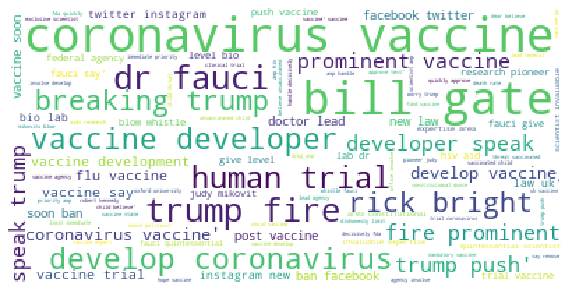

In [175]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#Word cloud
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
fig = plt.figure(1, figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("word1.png", dpi=900)

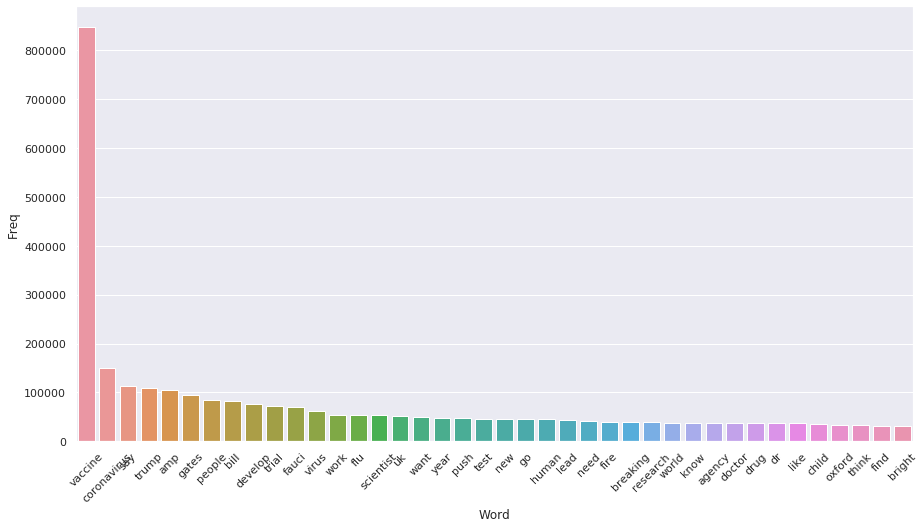

In [176]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, top_n=40)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize':(15,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

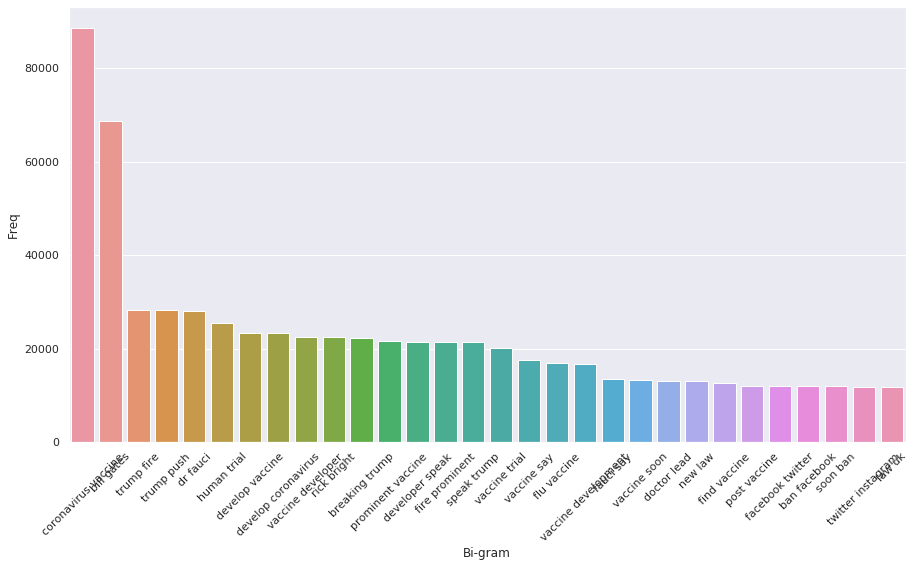

In [177]:
#Most frequently occuring Bi-grams
top2_words = get_top_n_words(corpus, top_n=30, ngram_range=(2, 2))
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(15,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)
plt.show()

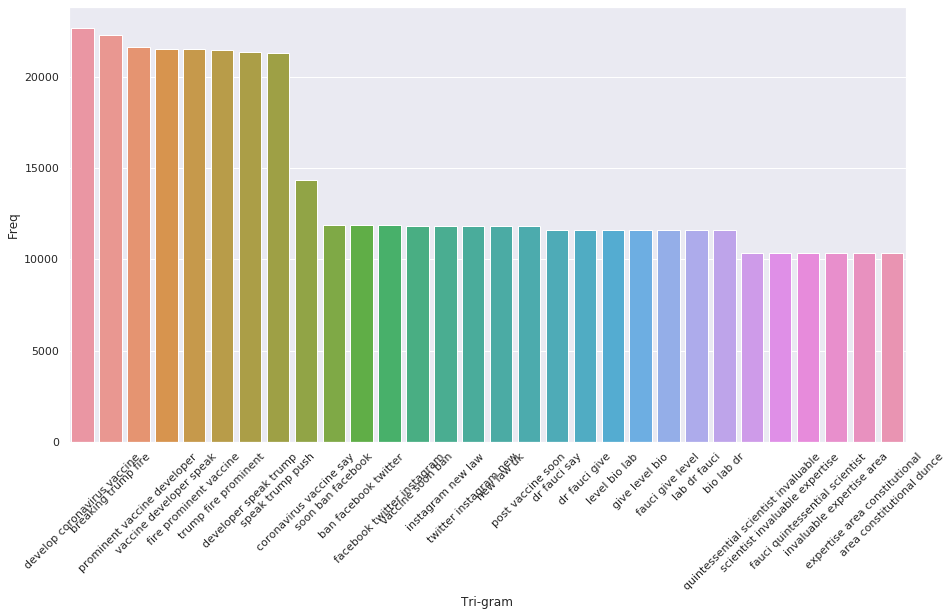

In [178]:
#Most frequently occuring Tri-grams
top3_words = get_top_n_words(corpus, top_n=30, ngram_range=(3, 3))
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)
plt.show()

In [179]:
keywords = get_keywords(tfidf_transformer, feature_names, cv, anti.tweet.values[0], top_n=10, stop_words=stop_words)
for i, k in enumerate(keywords):
    print(str(i) + ": " + k + " - " + str(keywords[k]))

0: constitution - 0.5937818641077602
1: california - 0.5293629447820368
2: fail - 0.46819202503619567
3: hear - 0.38470014068220715
